In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

In [6]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [7]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
df =pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6   -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7    0.063504  0.050680 -0.001895  0.066630  0.090620  0.108914  0.022869   
8    0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9   -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508 -0.024993   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
11   0.027178  0.050680  0.017506 -0.033214 -0.007073  0.045972 -0.065491   

In [9]:

df['DiseaseProgression']=diabetes.target

In [10]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [11]:
#df[df<0]=1

In [12]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [13]:
df.isnull().sum()

age                   0
sex                   0
bmi                   0
bp                    0
s1                    0
s2                    0
s3                    0
s4                    0
s5                    0
s6                    0
DiseaseProgression    0
dtype: int64

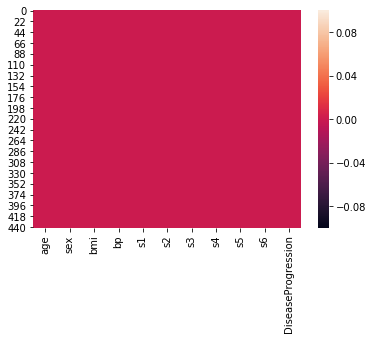

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.shape

(442, 11)

age                      AxesSubplot(0.125,0.657941;0.110714x0.222059)
sex                   AxesSubplot(0.257857,0.657941;0.110714x0.222059)
bmi                   AxesSubplot(0.390714,0.657941;0.110714x0.222059)
bp                    AxesSubplot(0.523571,0.657941;0.110714x0.222059)
s1                    AxesSubplot(0.656429,0.657941;0.110714x0.222059)
s2                    AxesSubplot(0.789286,0.657941;0.110714x0.222059)
s3                       AxesSubplot(0.125,0.391471;0.110714x0.222059)
s4                    AxesSubplot(0.257857,0.391471;0.110714x0.222059)
s5                    AxesSubplot(0.390714,0.391471;0.110714x0.222059)
s6                    AxesSubplot(0.523571,0.391471;0.110714x0.222059)
DiseaseProgression    AxesSubplot(0.656429,0.391471;0.110714x0.222059)
dtype: object

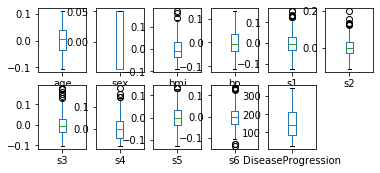

In [16]:
df.plot(kind='box', subplots=True, layout=(3,6), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D931209DA0>,
      dtype=object)

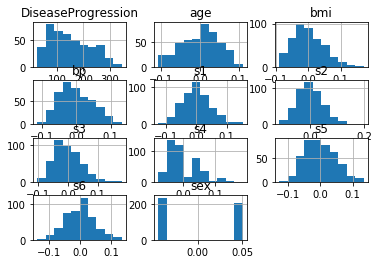

In [17]:
df.hist()

In [18]:
from scipy.stats import zscore
import numpy as np

In [19]:
z=np.abs(zscore(df))
z

array([[0.80050009, 1.06548848, 1.29708846, ..., 0.41855058, 0.37098854,
        0.01471948],
       [0.03956713, 0.93853666, 1.08218016, ..., 1.43655059, 1.93847913,
        1.00165882],
       [1.79330681, 1.06548848, 0.93453324, ..., 0.06020733, 0.54515416,
        0.14457991],
       ...,
       [0.87686984, 1.06548848, 0.33441002, ..., 0.98558469, 0.32567395,
        0.26145431],
       [0.9560041 , 0.93853666, 0.82123474, ..., 0.93615545, 0.54515416,
        0.88131756],
       [0.9560041 , 0.93853666, 1.53537419, ..., 0.08871747, 0.06442552,
        1.23540761]])

In [20]:
threshold=3
print(np.where(z>3))

(array([ 58, 123, 123, 123, 216, 230, 230, 256, 260, 261, 269, 322, 336,
       367, 441], dtype=int64), array([6, 4, 5, 7, 7, 4, 5, 2, 6, 6, 6, 7, 7, 2, 6], dtype=int64))


In [21]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [22]:
df_new.shape

(430, 11)

In [23]:
x=df_new.drop("DiseaseProgression",axis=1)
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [24]:
y=df_new["DiseaseProgression"]
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: DiseaseProgression, dtype: float64

In [25]:
print(x.shape)
print(y.shape)

(430, 10)
(430,)


In [26]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

In [27]:
x.skew()

0   -0.229772
1    0.121576
2    0.506102
3    0.286853
4    0.310491
5    0.255155
6    0.495647
7    0.583545
8    0.287276
9    0.225371
dtype: float64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=55)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 10)
(91, 10)
(339,)
(91,)


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range (20,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=41)
    lm=linear_model.LinearRegression()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,'is',max_r_score)

max r2 score corresponding to 20 is 0.5065363488976452


In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.4567679287053661

In [32]:
#max r2 score we get at random state=20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=20)
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
lm.score(x_train,y_train)

0.5255830810792853

In [33]:
lm.coef_

array([  1.70112411, -11.65099728,  24.78992609,  16.20689516,
       -41.23871433,  23.28545937,  10.08906573,  14.59080113,
        35.28205797,   2.33558165])

In [34]:
lm.intercept_

151.41783194841832

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is:", r2_score(y_test,y_pred))
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.40575268279702315
RMSE is: 56.308510558621855


In [37]:
df_new=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df_new

,Actual,Predicted
217,296.0,224.529339
131,158.0,62.637745
352,77.0,67.009693
366,233.0,254.577420
191,178.0,121.603647
107,144.0,159.206399
92,48.0,194.646317
219,185.0,140.457139
220,78.0,54.167844
95,162.0,117.210960


In [40]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 45.09552038471324
Mean Squared Error: 3170.648361330429
Root Mean Squared Error: 56.308510558621855


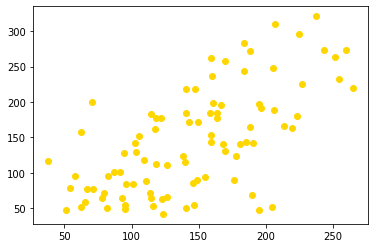

In [42]:
plt.scatter(y_pred,y_test,color="gold")

In [43]:
#save the model
from sklearn.externals import joblib
joblib.dump(lm,"Diabetes disease.pkl")

['Diabetes disease.pkl']